# Import libraries

In [1]:
# !pip install opendatasets

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import opendatasets as od
from src.procrustes_classifier import ProcClassifier as PC

# Test Plan:

Time-series data that:
* have high corrrelation
* breaks correlation
* Does not have correlation

Examples:
* TSLA - TSLA
* BTCUSD - ETHUSD
* S&P500 & AAPL
* VIX & S&P500
* Young's Modulus
* Security Videos
* Smart homes Falling people
* Heart rates
* Factory - defected vs non-deefected
* Wildfires
* Portfolio Management

# Import data for test

In [21]:
tsla = yf.download('TSLA', start='2010-01-01', end='2019-12-31')
btcusd = yf.download('BTC-USD', start='2010-01-01', end='2019-12-31')
ethusd = yf.download('ETH-USD', start='2010-01-01', end='2019-12-31')
aapl = yf.download('AAPL', start='2010-01-01', end='2019-12-31')
snp500 = yf.download('^GSPC', start='2010-01-01', end='2019-12-31') 
# vix = yf.download('^VIX', start='2010-01-01', end='2019-12-31') 
msft = yf.download('MSFT', start='2010-01-01', end='2019-12-31')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Example: all stocks

Take the base trend as S&P500. In a normal market environment with global economic factors, AAPL & S&P500 should be affected in a similar manner. However, when news comes out specific to AAPL, the trend should diverge.

This could be useful for portoflio managment when you want to see when your portfolio risk diverts from the model.

In [59]:
s1 = snp500.loc['2019-01-01':, 'Open'].to_numpy()
s2 = aapl.loc['2019-01-01':, 'Open'].to_numpy()
s3 = tsla.loc['2019-01-01':, 'Open'].to_numpy()
s4 = msft.loc['2019-01-01':, 'Open'].to_numpy()

print(s1.shape, s2.shape, s3.shape, s4.shape)

# train just on snp500
clf = PC()
clf.fit([s1])
print(clf.predict([s1, s2, s3, s4]))

clf = PC()
clf.fit([s2])
print(clf.predict([s1, s2, s3, s4]))

clf = PC()
clf.fit([s3])
print(clf.predict([s1, s2, s3, s4]))

clf = PC()
clf.fit([s4])
print(clf.predict([s1, s2, s3, s4]))

clf = PC()
clf.fit([s1, s2])
print(clf.predict([s1, s2, s3, s4]))

clf = PC()
clf.fit([s1, s2, s4])
print(clf.predict([s1, s2, s3, s4]))

clf = PC()
clf.fit([s1, s4])
print(clf.predict([s1, s2, s3, s4]))

clf = PC()
clf.fit([s1, s2, s3, s4])
print(clf.predict([s1, s2, s3, s4]))

clf = PC()
clf.fit([s2, s4])
print(clf.predict([s1, s2, s3, s4]))

clf = PC()
clf.fit([s3, s4])
print(clf.predict([s1, s2, s3, s4]))

(251,) (251,) (251,) (251,)
[0. 1. 1. 1.]
[1. 0. 1. 1.]
[1. 1. 0. 1.]
[1. 1. 1. 0.]
[0. 1. 1. 1.]
[0. 1. 1. 1.]
[0. 1. 1. 1.]
[0. 1. 1. 1.]
[1. 1. 1. 0.]
[1. 1. 1. 0.]


## Example: TSLA

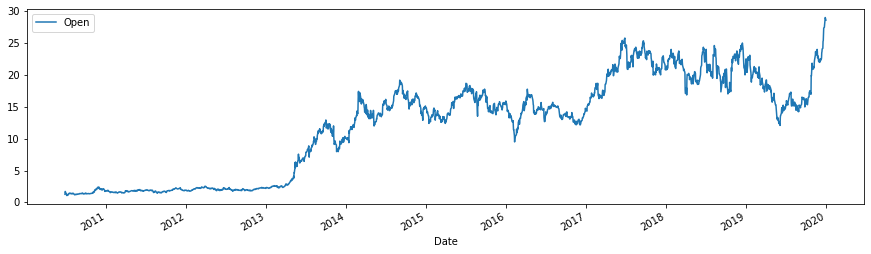

In [41]:
tsla.plot(y='Open', figsize=(15, 4))

In [43]:
tsla.shift(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,1.592667,281494500.0
2010-07-01 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,1.588667,257806500.0
2010-07-02 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,1.464000,123282000.0
2010-07-06 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,1.280000,77097000.0
...,...,...,...,...,...,...
2019-12-23 00:00:00-05:00,27.352667,27.533333,26.679333,27.039333,27.039333,221290500.0
2019-12-24 00:00:00-05:00,27.452000,28.134001,27.333332,27.948000,27.948000,199794000.0
2019-12-26 00:00:00-05:00,27.890667,28.364668,27.512667,28.350000,28.350000,120820500.0


In [50]:
s1 = tsla.loc['2011-01-01':, 'Open'].to_numpy()
s2 = tsla.shift(1).loc['2011-01-01':, 'Open'].to_numpy()
print(s1.shape, s2.shape)
clf = PC()
clf.fit([s1])
print(clf.predict(s1))
print(clf.predict(s2))

(2263,) (2263,)
[0.]
[1.]


## Example: BTCUSD vs ETHUSD

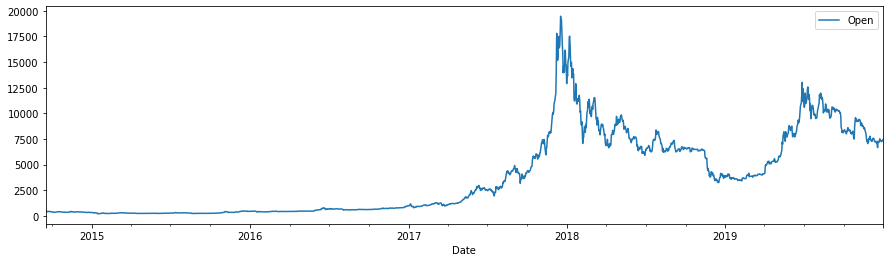

In [13]:
btcusd.plot(y='Open', figsize=(15, 4))

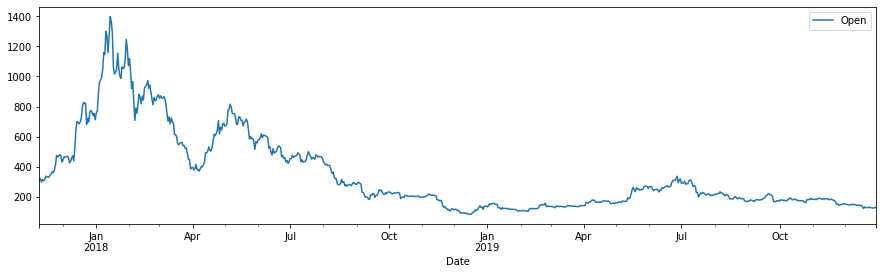

In [14]:
ethusd.plot(y='Open', figsize=(15, 4))

In [49]:
s1 = btcusd.loc['2019-01-01':, 'Open'].to_numpy()
s2 = ethusd.shift(1).loc['2019-01-01':, 'Open'].to_numpy()
print(s1.shape, s2.shape)
clf = PC()
clf.fit([s1])
print(clf.predict(s2))

(364,) (364,)
[1.]


## Example: Heart Rate Data

In [15]:
# od.download('https://www.kaggle.com/datasets/mcandocia/running-heart-rate-recovery')

In [16]:
heart_rate_running = pd.read_csv('./running-heart-rate-recovery/s1_laps_summary.csv')

In [17]:
heart_rate_running.head()

,event_id,timestamp,heart_rate,time_elapsed,total_running_time,altitude,distance,speed,cadence,start_time,...,total_time_spent_running_past_10800_to_14400_seconds,avg_temp,avg_temp2,avg_temp_mean,avg_lat,avg_long,avg_alt,avg_hr,total_dist,avg_temp_mode
0,1,2017-09-21T21:25:38Z,143.0,486.0,436.0,182.4,1.61317,13.2336,80.0,2017-09-21 21:17:32,...,0.0,NaN,NaN,NaN,41.966027,-87.646939,178.671811,145.828346,4.83519,NaN
1,1,2017-09-21T21:32:15Z,154.0,883.0,833.0,175.8,3.21954,14.3424,81.0,2017-09-21 21:25:39,...,0.0,NaN,NaN,NaN,41.966027,-87.646939,178.671811,145.828346,4.83519,NaN
2,1,2017-09-21T21:39:29Z,156.0,1317.0,1267.0,199.0,4.83101,12.9996,81.0,2017-09-21 21:32:16,...,0.0,NaN,NaN,NaN,41.966027,-87.646939,178.671811,145.828346,4.83519,NaN
3,2,2017-09-22T17:37:07Z,143.0,460.0,448.0,178.2,1.61227,14.5800,82.0,2017-09-22 17:29:27,...,0.0,NaN,NaN,NaN,41.975176,-87.650256,192.049602,155.442131,5.98351,NaN
4,2,2017-09-22T17:44:18Z,155.0,891.0,879.0,187.0,3.22219,13.2012,82.0,2017-09-22 17:37:08,...,0.0,NaN,NaN,NaN,41.975176,-87.650256,192.049602,155.442131,5.98351,NaN
